In [105]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option("display.max_columns", None)
plt.style.use('seaborn')
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = 'IPAexGothic'

In [106]:
# 現在の作業ディレクトリ
os.getcwd()

'/Users/takeru/Library/CloudStorage/OneDrive-個人用/Learn/Python/python-practical-data-analysis-100knocks/ch01'

# Ch.01 Webからの注文数を分析する

ある企業のECサイトでの商品の注文数の推移を分析していく。  
データの属性を理解し、分析をするためにデータを加工した後、  
データの可視化を行うことで問題を発見していくプロセスを学び。

### Knock01: データを読み込む

- customer_master.csv: 顧客データ
- item_master.csv: 商品データ
- transaction_1.csv: 購入明細データ
- transaction_2.csv: 購入明細データ
- transaction_2.csv: 購入明細データ
- transaction_detail_1.csv: 購入明細の詳細データ
- transaction_detail_2.csv: 購入明細の詳細データ

In [107]:
import pandas as pd

In [108]:
# 顧客データの読み込み

customer_master = pd.read_csv('../support/1章/customer_master.csv')
print(customer_master.shape)
display(customer_master.head())

(5000, 9)


,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [109]:
# 商品データの読み込み

item_master = pd.read_csv('../support/1章/item_master.csv')
print(item_master.shape)
display(item_master.head())

(5, 3)


,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [110]:
# 購入明細データ1の読み込み

transaction_1 = pd.read_csv('../support/1章/transaction_1.csv')
print(transaction_1.shape)
display(transaction_1.head())

(5000, 4)


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [111]:
# 購入明細データ2の読み込み

transaction_2 = pd.read_csv('../support/1章/transaction_2.csv')
print(transaction_2.shape)
display(transaction_2.head())

(1786, 4)


,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [112]:
# 購入明細の詳細データ1の読み込み

transaction_detail_1 = pd.read_csv('../support/1章/transaction_detail_1.csv')
print(transaction_detail_1.shape)
display(transaction_detail_1.head())

(5000, 4)


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [113]:
# 購入明細の詳細データ2の読み込み

transaction_detail_2 = pd.read_csv('../support/1章/transaction_detail_2.csv')
print(transaction_detail_2.shape)
display(transaction_detail_2.head())

(2144, 4)


,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


### Knock02: データを結合（ユニオン）する

In [114]:
# transaction_1とtransaction_2を縦に結合する（ユニオン）

transaction = pd.concat(
    [transaction_1, transaction_2], ignore_index=True
)
print(transaction.shape)
display(transaction.head())
display(transaction.tail())

(6786, 4)


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


,transaction_id,price,payment_date,customer_id
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738
6785,T0000006898,85000,2019-07-31 23:41:38,AS834214


In [115]:
# transaction_detail_1とtransaction_detail_2を縦に結合する（ユニオン）

transaction_detail = pd.concat(
    [transaction_detail_1, transaction_detail_2], ignore_index=True
)
print(transaction_detail.shape)
display(transaction_detail.head())
display(transaction_detail.tail())

(7144, 4)


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


,detail_id,transaction_id,item_id,quantity
7139,7139,T0000006894,S004,1
7140,7140,T0000006895,S002,1
7141,7141,T0000006896,S001,2
7142,7142,T0000006897,S002,1
7143,7143,T0000006898,S002,1


### Knock03: 売上データ同士を結合（ジョイン）する

In [116]:
# 売上データのジョインする
# transaction_detailに
# 付加するデータ:
# transaction[""transaction_id", "payment_date", "customer_id""]
# 付加しない:
# transaction["price"]は、1回の購買データごとの合計金額
# 共通するデータ列（ジョインキー）:
# transaction["transaction_id"]

join_data = pd.merge(
    transaction_detail, 
    transaction[["transaction_id", "payment_date", "customer_id"]],
    on="transaction_id",
    how="left"
)
print(join_data.shape)
display(join_data.head())
display(join_data.tail())

(7144, 6)


,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738
7143,7143,T0000006898,S002,1,2019-07-31 23:41:38,AS834214


### Knock04: マスターデータを結合（ジョイン）する

In [117]:
# マスターデータをジョインする
# 付加するデータ:
# customer_master, item_master
# 共通するデータ列:
# customer_id, item_id

join_data = pd.merge(
    join_data,
    customer_master,
    on="customer_id",
    how="left"
)
join_data = pd.merge(
    join_data,
    item_master,
    on="item_id",
    how="left"
)
print(join_data.shape)
display(join_data.head())
display(join_data.tail())

(7144, 16)


,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,宍戸 明,2019-01-04 13:24:40,ししど あきら,shishido_akira@example.com,M,64,1955/1/13,福井県,PC-D,180000
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,相原 みき,2019-02-11 19:34:02,あいはら みき,aihara_miki@example.com,F,74,1945/2/3,北海道,PC-B,85000
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,松田 早紀,2019-04-17 09:23:50,まつだ さき,matsuda_saki@example.com,F,40,1979/5/25,福島県,PC-A,50000
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,進藤 正敏,2019-02-20 18:15:56,しんどう まさとし,shinndou_masatoshi@example.com,M,56,1963/2/21,東京都,PC-B,85000
7143,7143,T0000006898,S002,1,2019-07-31 23:41:38,AS834214,田原 結子,2019-04-07 03:20:19,たはら ゆうこ,tahara_yuuko@example.com,F,74,1944/12/18,愛知県,PC-B,85000


### Knock05: 必要なデータ列を作る

In [118]:
# price = quantity * item_price

join_data["price"] = join_data["quantity"] * join_data["item_price"]
print(join_data.shape)
display(join_data[["quantity", "item_price", "price"]].head())
display(join_data[["quantity", "item_price", "price"]].tail())

(7144, 17)


,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


,quantity,item_price,price
7139,1,180000,180000
7140,1,85000,85000
7141,2,50000,100000
7142,1,85000,85000
7143,1,85000,85000


### Knock06: データ検算をする

In [119]:
print(join_data["price"].sum())
print(transaction["price"].sum())

971135000
971135000


In [120]:
join_data["price"].sum() == transaction["price"].sum()

True

### Knock07: 各種統計量を把握する

In [121]:
# 欠損値の確認

join_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

In [122]:
# 統計量の計算

join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.0000,7144.0000,7144.0000,7144.0000,7144.0000
mean,3571.5000,1.1999,50.2657,121698.6282,135937.1501
std,2062.4395,0.5136,17.1903,64571.3118,68511.4533
min,0.0000,1.0000,20.0000,50000.0000,50000.0000
25%,1785.7500,1.0000,36.0000,50000.0000,85000.0000
50%,3571.5000,1.0000,50.0000,102500.0000,120000.0000
75%,5357.2500,1.0000,65.0000,187500.0000,210000.0000
max,7143.0000,4.0000,80.0000,210000.0000,420000.0000


In [123]:
# データ範囲

print(join_data["payment_date"].min())
print(join_data["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


### Knock08: 月別でデータを集計する

In [124]:
# データ型の確認

join_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
price                  int64
dtype: object

In [125]:
# "payment_date"をdatetime型に変更

join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m")
print(join_data[["payment_date", "payment_month"]].head())
print(join_data[["payment_date", "payment_month"]].tail())

         payment_date payment_month
0 2019-02-01 01:36:57        201902
1 2019-02-01 01:37:23        201902
2 2019-02-01 02:34:19        201902
3 2019-02-01 02:47:23        201902
4 2019-02-01 04:33:46        201902
            payment_date payment_month
7139 2019-07-31 21:20:44        201907
7140 2019-07-31 21:52:48        201907
7141 2019-07-31 23:35:25        201907
7142 2019-07-31 23:39:35        201907
7143 2019-07-31 23:41:38        201907


In [126]:
# 月ごとの集計

join_data.groupby("payment_month").sum()["price"]

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

### Knock09: 月別、商品別でデータを集計する

In [127]:
# groupby()で月別、商品別に集計

join_data.groupby(["payment_month", "item_name"]).sum()[["price", "quantity"]]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [128]:
# pivot_table()で月別、商品別に集計

pd.pivot_table(
    join_data, 
    index='item_name',
    columns='payment_month',
    values=['price', 'quantity'],
    aggfunc='sum'
)

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

### Knock10: 商品別の売上推移を可視化する

In [129]:
# グラフ作成用データ

graph_data = pd.pivot_table(
    join_data,
    index='payment_month',
    columns='item_name',
    values='price',
    aggfunc='sum'
)
display(graph_data)

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000
201907,25250000,28220000,19440000,26100000,71610000


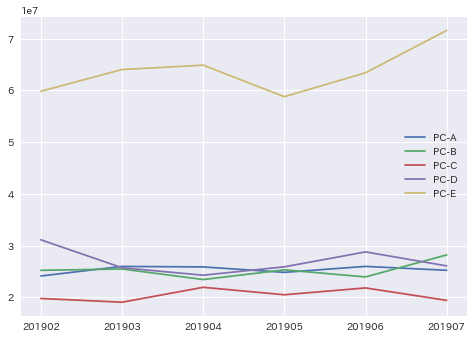

In [130]:
# 商品別の売上推移

plt.plot(list(graph_data.index), graph_data["PC-A"], label='PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label='PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label='PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label='PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label='PC-E')
plt.legend()